In [4]:
# test train split

import os
import numpy as np
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import resize  # Import the resize function

# Define the path to your dataset folder
dataset_path = 'F:/datasets/cm/dataset1/CASIA1'  # Modify this to the actual path of your dataset

# List all class folders in the dataset directory
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Initialize lists to hold images and labels
images = []
labels = []

# List of valid image formats
valid_formats = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')  # Add more formats if needed

# Loop through each class folder and label the images
for class_label, class_name in enumerate(class_folders):
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        if filename.lower().endswith(valid_formats):  # Check if the format is valid
            image = io.imread(os.path.join(class_path, filename))
            images.append(image)
            labels.append(class_label)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Calculate the minimum row and column dimensions
min_row_dim = min(image.shape[0] for image in X_train)
min_col_dim = min(image.shape[1] for image in X_train)

# Resize all images in X_train and X_test to the minimum dimensions
target_size = (min_row_dim, min_col_dim)
X_train_resized = [resize(image, target_size) for image in X_train]
X_test_resized = [resize(image, target_size) for image in X_test]

# Convert the lists of resized images to NumPy arrays
X_train = np.array(X_train_resized)
X_test = np.array(X_test_resized)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1376, 246, 256, 3)
X_test shape: (345, 246, 256, 3)
y_train shape: (1376,)
y_test shape: (345,)


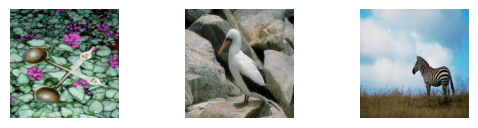

In [3]:
import matplotlib.pyplot as plt

# View a few images
for i in range(3):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.axis("off")  # Turn off axis labels

plt.show()

In [11]:


from sklearn import linear_model

#Create Linear Regression object
model = linear_model.LinearRegression()

#Now let us call fit method to train the model using independent variables.
#And the value that needs to be predicted (Images_Analyzed)

model.fit(X_train, y_train) #Indep variables, dep. variable to be predicted
print(model.score(X_train, y_train))  #Prints the R^2 value, a measure of how well


prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


ValueError: Found array with dim 4. LinearRegression expected <= 2.

In [12]:
# # Reshape the image data into 1D arrays
# X_train_flattened = X_train.reshape(X_train.shape[0], -1)
# X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression object
model = linear_model.LinearRegression()

# Train the model using flattened image data
model.fit(X_train_flattened, y_train)

# Print R^2 score
print("R^2 score:", model.score(X_train_flattened, y_train))

# Predict using the test data
prediction_test = model.predict(X_test_flattened)
print("Predictions:", prediction_test)
print("Mean squared error:", np.mean((prediction_test - y_test) ** 2))


R^2 score: 1.0
Predictions: [ 1.13149279e+00  1.38854334e-01  1.34878431e+00  2.26381609e+00
  1.09791697e+00  8.00300613e-01  8.11799496e-01  6.40477606e-01
  8.86757431e-01 -3.44418104e-01  2.05459786e-01 -3.33469126e-01
  1.02259320e+00 -1.31418544e-01  2.70827550e-01 -2.35418292e-01
 -9.75406667e-02  2.32544341e+00  7.50306802e-01  5.76192980e-01
  5.29877942e-01  4.72619948e-01 -2.93852935e-01 -2.51894488e-01
  7.97022695e-01  2.50252007e-01  2.03682661e-01  5.07354124e-01
  3.04161674e+00  9.96947011e-01  6.57424515e-01  4.78870176e-01
  5.64956804e-01 -3.64222642e-01  6.77696683e-01  1.55906449e+00
  3.48072544e-01  1.61088557e+00  5.42214552e-01  4.10286172e-01
  5.78951592e-01  4.85536640e-01  2.93393879e-01  2.30320560e+00
 -5.35129846e-02 -1.98868454e-01 -4.04312351e-01  1.07890205e+00
  1.59580964e-02 -1.03444723e+00  5.74012299e-01  2.09607202e-01
  8.15816825e-01  1.42247738e+00 -7.39771952e-01 -3.05533630e-01
 -3.76234975e-01  2.29205633e-01  1.04903494e+00  1.35854803e+